Recitation notes by Eric Wong for 15-388/688 Practical Data Science

In [1]:
import matplotlib
matplotlib.use('svg')
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Numpy 101

The cross validation and collaborative filtering problems largely just uses numpy calls.  Most of these are completely standard, but we'll review some of the basics here so that you know what sort of methods you can apply.


### Basic array construction

First, let's do a quick review of matrices (really 2D arrays) and vectors (1D arrays) in numpy.  We construct 1D and 2D arrays using a variety of functions.

In [2]:
import numpy as np
m,n = (10,5)
A = np.random.randn(m,n) # random gaussian elements
A = np.random.rand(m,n) # random uniform [0,1] elements
A = np.ones((m,n)) # all ones
A = np.zeros((m,n)) # all zeros
A = np.eye(n) # identity

# same as above but vector (1D array) versions
b = np.random.randn(m)
b = np.ones(m)
b = np.zeros(m)
b = np.arange(m) # range 0,..,m-1
b = np.random.permutation(m) # random permutation of 0... m-1

### Types of arrays

In [3]:
A = np.random.randn(m,n).astype(int)

### Accessing elements of arrays

In [4]:
A = np.random.randn(m,n)
A[0,0] # 0,0 element
A[:,0] # 0th column
A[0,:] # 0th row
A[0,0:2] # 0th row, colums 0,1
A[[1,2,4],:] # 1,2,4th row

# boolean array indexing
b = np.random.randn(m)
i = b > 0
A[i,:] # rows selected by True entries of i

# integer array index
b = np.arange(5)
A[b,:];

### Example: creating one-hot encoding

In [5]:
k = 5
n = 10
b = (np.random.rand(n)*k).astype(int) # vector of non-negative integers
A = np.eye(k)[b,:] # one-hot binary encoding of b

### Scaling rows or columns of 2D arrays

In [9]:
A = np.ones((m,n))
A*np.random.randn(n) # scale columns of A
A*np.random.randn(m)[:,None]; # scale rows of B

### Matrix-scalar operations

In [21]:
m,n,p = (10,5,7)
A = np.random.randn(m,n)
A*3 # multiplies every entry by 3
A/3 # divides every entry by 3
A+3 # adds 3 to evry entry
np.minimum(A,1); # takes minimum of each element in A and 1

### Matrix-matrix and matrix-vector products

In [6]:
m,n,p = (10,5,7)
A = np.random.randn(m,n)
b = np.random.randn(n)
C = np.random.randn(n,p)
A.dot(b) # matrix-vector product, returns vector (1D array)
A.dot(C); # matrix-matrix product, returns matrix (2D array)

### Elementwise operations and functions

In [23]:
A = np.random.randn(m,n)
B = np.random.rand(m,n)
A+B # elementwise addition
A-B # elementwise substraction
A*B # elementwise multiplication
A/B # elementiwse division

np.exp(A) # elementwise exponential
np.log(B); # elementwise logarithm

A>B # elementwise comparison, returns a matrix of booleans
np.all(A>B) # test if all booleans in an array are true
np.any(A>B) # test if any booleans are true

True

### Sums, means, maxes, etc

In [26]:
np.mean(A) # mean of all elements of A
np.max(A) # max of all elements
np.min(A) # min of all elements
np.std(A) # standard deviation of elements
np.argmax(A) # index of largest value of A

np.mean(A, axis=0) # mean of each column
np.mean(A, axis=1) # mean of each row
np.max(A,axis=0) # max along each column
np.min(A,axis=0) # min along each column
np.std(A, axis=0) # standard deviation of each column
np.argmax(A,axis=0) # index of maximum elements along each column

# Example: maximum of one-hot encoding
k = 5
n = 10
b = (np.random.rand(n)*k).astype(int) # vector of non-negative integers
A = np.eye(k)[b,:] # one-hot binary encoding of b
b - np.argmax(A,axis=1); # both these terms are the same, so result will be zero-array


### Creating block matrices

In [9]:
A = np.random.randn(m,n)
B = np.random.randn(m,n)
np.hstack([A,B]) # creata a matrix of [A, B], stacked horizontally
np.vstack([A,B]) # create a matrix [[A],[B]], stacked verically
np.bmat([[A,B],[B,A]]) # block matrix [[A,B],[B,A]], stacking vertically and horizaontally (note)

# above np.bmat call annoyingly returns an np.matrix type, this call returns it to an array
np.asarray(np.bmat([[A,B],[B,A]]));


### Norms

In [10]:
b = np.random.randn(n)
np.linalg.norm(b) # l2 norm of b
np.linalg.norm(b)**2 # squared l2 norm
np.linalg.norm(b,1) # l1 norm, sum of absolute values

4.3516673920599747

### Solving linear systems

In [ ]:
b = np.array([-13,9])
A = np.array([[4,-5], [-2,3]])

np.linalg.inv(A)     # explicitly form inverse
np.linalg.solve(A, b) # return A^(-1)*b, more efficient and numerically stable

## Numpy Tricks & Performance

The more advanced algorithms take much longer to run, so its important to write them efficiently. Things like SVM and KMeans are quick and easy even if written inefficiently, but EM algorithms and matrix factorization can take significantly longer even if written well. 

### Iterating over matrices

Numpy has a list-like indexing method. You don't need to always provide all indices. 

In [ ]:
X = np.random.randn(6,10)
X[0] # 0th row
X.T[0] # 0th column
for Xi in X:
    Xi # iterates over each row of X
for Xj  in X.T:
    Xj # iterates over each column of X
for i,Xi in enumerate(X):
    i,Xi # iterates and enumerates each row of X, nicer than doing X[i] within the loop

### Preallocation
Numpy arrays are not like lists. While lists are implemented as unbounded arrays and can be resized somewhat efficiently, numpy arrays are optimized for fixed shape operations. 

Pre-allocate any matrices that you'll use over and over again that don't change (like identity matrices), instead of recreating them every iteration. 

In [ ]:
%%timeit
# don't iteratively append rows to a matrix
n = 1000
X = np.ones(n)
for _ in range(200):
    X = np.vstack([X, np.ones(n)])

In [ ]:
%%timeit
# Instead, preallocate and assign values
n = 1000
X = np.zeros((200,n))
for i in range(200):
    X[i] = np.ones(n)

In [ ]:
# preallocate matrices that don't change
n = 1000
X = np.random.randn(n,n)
D = np.eye(n)*1e-4
%timeit [X+D for _ in range(10)]
%timeit [X+np.eye(n)*1e-4 for _ in range(10)]

### Computing pairwise distances
Recall from Zico's slides that for KMeans, you need to compute all distances from points to cluster centers. We can compute them naively:

In [ ]:
n,m,k = 4,6,2
X = np.random.randn(n,k)
Y = np.random.randn(m,k)

In [ ]:
%%timeit
D0 = np.zeros((n,m))
for i, Xi in enumerate(X):
    for j, Yj in enumerate(Y):
        D0[i,j] = ((Xi-Yj)**2).sum()

As is the theme with all matrix algebra, it is significantly more efficient to do it in matrix form. 

In [ ]:
%%timeit
D = (-2*X.dot(Y.T) + np.sum(X**2,axis=1)[:,None] + np.sum(Y**2, axis=1))

### Min/argmin
Use these functions judiciously. Never iterate through your matrix to find the smallest entry one. 

In [ ]:
n,m = 10,6
X = np.random.randn(n,m)
X.argmin(axis=1)
X.min(axis=0);

# Scipy.sparse 

Your SVM implementation should work on both dense and sparse feature matrices. The sparse format is particularly important, since using straight up tfidf features will result in 100k+ features. 

When creating sparse matrices, you can use the coo_matrix format. csc_matrix and csr_matrix will be faster for performing matrix operations. You can convert between types (in time linear to the number of sparse entries). 

### Basic array construction

In [34]:
import scipy.sparse as sp
A = sp.coo_matrix(([1.0,3.0,4.0], ([1,2,3], [2,2,3]))) # use coo_matrix((data, (i, j))) constructor
A = A.tocsr() # convert to csr format
A = A.tocsc() # convert to csc format
A = sp.eye(m) # create sparse m by m identity matrix
A = sp.diags([1,2,3]) # create a sparse diagonal matrix with entries [1,2,3]
A = sp.random(m,n,0.1) # create a sparse m by m matrix with density 0.1 and randomly distributed values
A.toarray(); # use toarray() instead of todense() to avoid creating numpy.matrix objects instead of ndarrays

### Explicit zeros are 'non-zero entries'

In [43]:
A = sp.diags([0,0,0])
A.nnz; # A has 3 'non-zero' entries, since they are explicitly zero

### Types of arrays (same as numpy)

In [88]:
A = sp.random(m,n,0.1).astype(int)

### Accessing elements (same as numpy)

In [98]:
A = sp.random(m,n).tocsr() # coo_matrix doesn't support indexing
A[0,0] # get 0,0th element
A[:,0] # 0th column
A[0,:] # 0th row
A[0,0:2] # 0th row, colums 0,1

# boolean array indexing
b = np.random.randn(m)
i = b > 0
A[i,:] # rows selected by True entries of i

# integer array index
b = np.arange(5)
A[b,:];

### Example: creating sparse one-hot encoding

In [40]:
k = 5
n = 10
b = (np.random.rand(n)*k).astype(int) # vector of non-negative integers
A = sp.eye(k).tocsr()[b,:] # sparse one-hot binary encoding of b

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.]])

### Scaling rows or columns of 2D sparse matrices

In [177]:
A = sp.random(m,n,0.2)
A*sp.diags([2]*n).toarray() # scale columns of A
sp.diags(np.random.randn(m))*A; # scale rows of B

### Creating sparse block matrices (same as numpy, but use sp instead of np)

In [85]:
A = sp.random(m,n,0.1)
B = sp.random(m,n,0.3)
sp.hstack([A,B])
sp.vstack([A,B])
sp.bmat([[A,B],[B,A]]);

### Matrix-matrix and matrix-vector products

In [171]:
m,n,p = (10,5,7)
A = sp.random(m,n, 0.3)
b = np.random.randn(n)
C = np.random.randn(n,p)
D = sp.random(n,p, 0.2)
A.dot(b) # sparse matrix-vector product, returns vector (1D dense array)
A*b # for sparse matrices A, this is equivalent to A.dot(b)
A.dot(C) # sparse matrix-matrix product, returns matrix (2D dense array)
A*C # for sparse matrices A, this is equivalent to A.dot(C)
A.dot(D) # sparse matrix-sparse matrix product, returns sparse matrix (2D sparse matrix)
A*D; # for sparse matrices A, this is equivalent to A.dot(D)

# Using scipy.sparse with numpy arrays
When doing operations with both sparse and dense matrices, **prefer the sparse implementations of otherwise identical functions**. Numpy does not work very well with sparse matrices, however Scipy.sparse can deal with numpy arrays. 

### Matrix matrix products

In [44]:
m,n = 5,3
A = sp.random(m,n,0.2).tocsr()
B = np.random.randn(m,n)
A.dot(B.T) # dot inherits implementation from scipy.sparse, works as expected
B.T.dot(A.tocoo()) # dot inherits from numpy, does NOT WORK AS EXPECTED. for some reason, is equivalent to B kron A, if you're familiar with kronecker product
# B.dot(A.tocsr()) # does not even work, throws an error
(A.T.dot(B)).T; # computes B.T.dot(A), for A sparse and B dense, by using transpose to switch the order and using the sparse dot

### Element-wise multiplication

In [49]:
m,n = 5,3
A = sp.random(m,n,0.2).tocsr()
B = np.random.randn(m,n)
np.multiply(A,B) # does NOT work as expected, does B kron A instead and stores it in block format
A.multiply(B); # using the scipy multiply works as expected

### Duck typing

In general, try to not assume any underlying matrix type and just use operations common to both sparse and dense matrices. When working with vectors, it is *usually* safe to always work with dense vectors, since vectors are usually much smaller than matrices. Be careful when passing sparse matrices to numpy functions, since behavior can vary wildly and will probably not work as intended. 

In [187]:
m,n = 5,3
A1 = sp.random(m,n,0.2).tocsr()
A2 = np.random.randn(m,n)
b = np.random.randn(n)

# perform type agnostic dot product
A1.dot(b) 
A2.dot(b) #instead of np.dot()

# perform type agnostic row scaling
sp.diags(np.random.randn(m)).dot(A1)
sp.diags(np.random.randn(m)).dot(A2) # instead of using numpy broadcasting

# type agnostic array max
A1.max()
A2.max(); # instead of np.max

# Scipy.stats

This module has all the functions you'll need when dealing with standard random variables (https://docs.scipy.org/doc/scipy/reference/stats.html), including:
* Bernoulli
* Binomial
* Geometric
* Poisson
* Uniform discrete
* Normal
* Multivariate normal
* Dirichlet
* Beta
* chi squared
* exponential
* F
* Laplace
* Gamma 
* Pareto
* t
* Uniform continuous
* ... and more

The usage of these libraries are all the same, but you should check the documentation for the specific form in which they parameterize each random variable. We'll demonstrate usage for a discrete and a continuous random variable. 

### Bernoulli Distribution

In [56]:
st.bernoulli.pmf(0,0.2) # P(X = 0) for a bernoulli rv with p=0.2
X = st.bernoulli(0.2) # create bernoulli random variable with p=0.2
X.pmf(1) # P(X = 1)
X.logpmf(1) # log(P(X=1))

-1.6094379124341003

### 1D Normal / Gaussian random variable

In [54]:
import scipy.stats as st
st.norm.pdf(1) # P(X=1 | standard normal, mean=0, variance 1)
st.norm.pdf(0,loc=1,scale=2) # P(X=0 | mean=1, standard deviation = 2)
X = st.norm(loc=1,scale=2) # create a normal random variable with mean 1, standard deviation 2
X.pdf(0) # same as st.norm.pdf(0,loc=1,scale=2)
X.logpdf(0) # more accurate than np.log(pdf(X.pdf(0))) on extreme values

-1.7370857137646181

### cdf and inverse cdf 

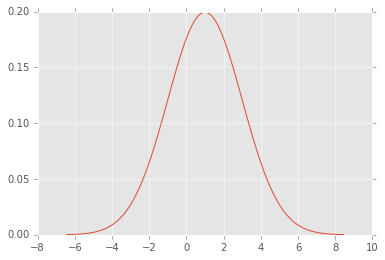

In [52]:
X.cdf(1) # P(X <= 1)
X.ppf(0.5) # the value x such that P(X <= x) = 0.5
x = np.linspace(X.ppf(0.0001), X.ppf(0.9999), 100) 
plt.plot(x, X.pdf(x)) # simple visualization of the distribution using the inverse cdf to find upper and lower bounds

In [63]:
i = 0
def foo(): 
    global i
    i += 1
foo()

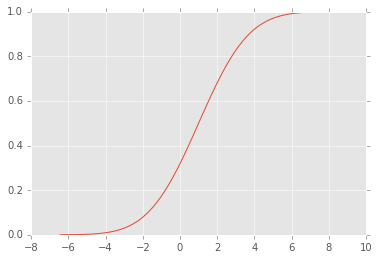

In [46]:
plt.plot(x, X.cdf(np.linspace(-6,8,100))) # simple visualization of the cdf 